In [22]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=5)

1658    S:-)if we have one good partnership going we w...
1509    Sounds like something that someone testing me ...
3266    44 7732584351, Do you want a New Nokia 3510i c...
5199           Ugh my leg hurts. Musta overdid it on mon.
3217    URGENT! We are trying to contact U. Todays dra...
                              ...                        
3046    Hello, yeah i've just got out of the bath and ...
1725              There bold 2  &lt;#&gt; . Is that yours
4079                  Gam gone after outstanding innings.
2254                         Lol enjoy role playing much?
2915    Sorry! U can not unsubscribe yet. THE MOB offe...
Name: Message, Length: 4457, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_test_count = v.transform(X_test)

In [16]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model = MultinomialNB()
model.fit(X_train_count, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_count)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



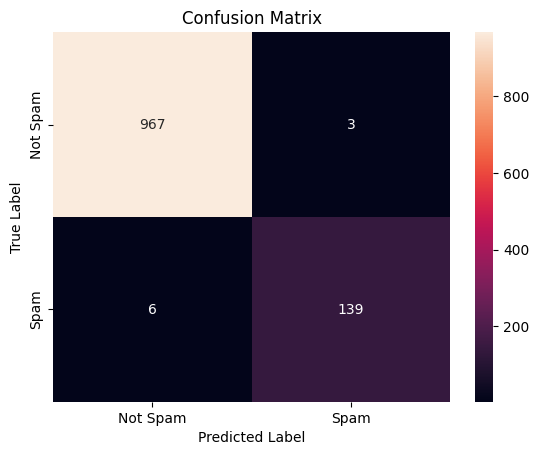

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

pipe.fit(X_train, y_train)
y_pred_pipe = pipe.predict(X_test)
report_pipe = classification_report(y_test, y_pred_pipe)
print(report_pipe)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

